Predictions: [-1. -1.]


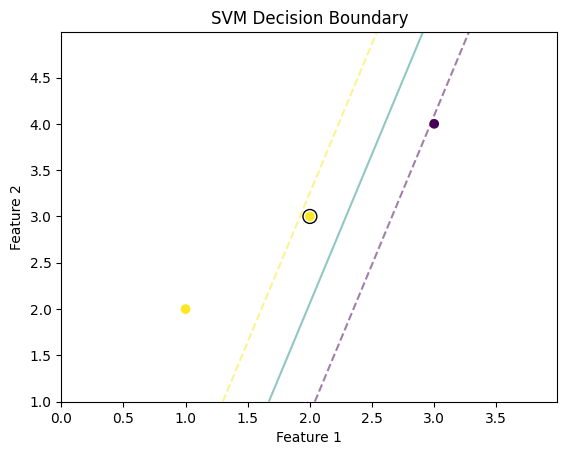

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.support_vectors = None

    def fit(self, X, y):
        # Inisialisasi bobot dan bias
        self.w = np.zeros(X.shape[1])
        self.b = 0

        # Pelatihan SVM menggunakan metode gradien turun
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                if y[i] * (np.dot(X[i], self.w) - self.b) >= 1:
                    self.w -= self.learning_rate * (2 * 1 / self.epochs * self.w)
                else:
                    self.w -= self.learning_rate * (2 * 1 / self.epochs * self.w - np.dot(X[i], y[i]))
                    self.b -= self.learning_rate * y[i]

        # Menyimpan support vectors untuk plotting
        self.support_vectors = X[y * (np.dot(X, self.w) - self.b) < 1]

    def predict(self, X):
        # Menggunakan fungsi keputusan untuk klasifikasi
        return np.sign(np.dot(X, self.w) - self.b)

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y)

        # Plot hyperplane
        w = self.w
        b = self.b
        x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
        y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) - b
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

        # Plot support vectors
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('SVM Decision Boundary')
        plt.show()

# Contoh penggunaan
X_train = np.array([[1, 2], [2, 3], [3, 4]])
y_train = np.array([1, 1, -1])

svm_model = SVM()
svm_model.fit(X_train, y_train)

X_test = np.array([[4, 5], [5, 6]])
predictions = svm_model.predict(X_test)
print("Predictions:", predictions)

# Visualisasi decision boundary
svm_model.plot_decision_boundary(X_train, y_train)